In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [3]:
# Step 1: Load the dataset
data = pd.read_csv(r"D:\New folder\Dataset .csv")


In [3]:
# Drop unnecessary columns
data.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color', 'Rating text'], axis=1, inplace=True)

In [4]:
# Handling missing values
data.dropna(inplace=True)

In [5]:

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Has Table booking'] = label_encoder.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = label_encoder.fit_transform(data['Has Online delivery'])
data['Is delivering now'] = label_encoder.fit_transform(data['Is delivering now'])
data['Switch to order menu'] = label_encoder.fit_transform(data['Switch to order menu'])



In [6]:
# One-hot encoding categorical variable 'Cuisines'
cuisines_onehot = data['Cuisines'].str.get_dummies(sep=', ')
data = pd.concat([data, cuisines_onehot], axis=1)
data.drop('Cuisines', axis=1, inplace=True)


In [7]:
# Print data types of all columns
print(data.dtypes)


Longitude               float64
Latitude                float64
Average Cost for two      int64
Has Table booking         int32
Has Online delivery       int32
                         ...   
Turkish Pizza             int64
Vegetarian                int64
Vietnamese                int64
Western                   int64
World Cuisine             int64
Length: 155, dtype: object


In [8]:
# Print summary statistics for numerical columns(count,mean,min,max)
print(data.describe())


         Longitude     Latitude  Average Cost for two  Has Table booking  \
count  9542.000000  9542.000000           9542.000000        9542.000000   
mean     64.274997    25.848532           1200.326137           0.121358   
std      41.197602    11.010094          16128.743876           0.326560   
min    -157.948486   -41.330428              0.000000           0.000000   
25%      77.081565    28.478658            250.000000           0.000000   
50%      77.192031    28.570444            400.000000           0.000000   
75%      77.282043    28.642711            700.000000           0.000000   
max     174.832089    55.976980         800000.000000           1.000000   

       Has Online delivery  Is delivering now  Switch to order menu  \
count          9542.000000        9542.000000                9542.0   
mean              0.256864           0.003563                   0.0   
std               0.436927           0.059589                   0.0   
min               0.000000     

In [9]:
# Check unique values in 'Aggregate rating' column
print(data['Aggregate rating'].unique())


[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


In [10]:
# Check for non-numeric values in the dataset
non_numeric_values = data.select_dtypes(include=['object']).columns
print(non_numeric_values)


Index([], dtype='object')


In [11]:
# Print out the first few rows of the dataset
print(data.head())


    Longitude   Latitude  Average Cost for two  Has Table booking  \
0  121.027535  14.565443                  1100                  1   
1  121.014101  14.553708                  1200                  1   
2  121.056831  14.581404                  4000                  1   
3  121.056475  14.585318                  1500                  0   
4  121.057508  14.584450                  1500                  1   

   Has Online delivery  Is delivering now  Switch to order menu  Price range  \
0                    0                  0                     0            3   
1                    0                  0                     0            3   
2                    0                  0                     0            4   
3                    0                  0                     0            4   
4                    0                  0                     0            4   

   Aggregate rating  Votes  ...  Teriyaki  Tex-Mex  Thai  Tibetan  Turkish  \
0               4.8    314

In [12]:
#ADDING MORE FEATURES ONE FEATURE AT A TIME
# Selecting a subset of features
subset_features = ['Longitude', 'Latitude', 'Average Cost for two', 'Has Table booking', 'Has Online delivery']

# Splitting the data into features and target variable
X_subset = data[subset_features]
y = data['Aggregate rating']

# Splitting the subset data into training and testing sets
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Selecting a regression algorithm (Lasso Regression)
regression_model = Lasso()

# Training the model on the training data using the subset of features
regression_model.fit(X_train_subset, y_train)

# Making predictions on the testing data
y_pred_subset = regression_model.predict(X_test_subset)

# Evaluating the model's performance
mse_subset = mean_squared_error(y_test, y_pred_subset)
r2_subset = r2_score(y_test, y_pred_subset)

print("Mean Squared Error (MSE) for subset of features:", mse_subset)
print("R-squared (R^2) for subset of features:", r2_subset)




Mean Squared Error (MSE) for subset of features: 2.2529258753050656
R-squared (R^2) for subset of features: 0.016203407889085253


In [13]:
# Selecting additional features to add one at a time
additional_features = ['Is delivering now', 'Switch to order menu', 'Price range']

# Iterate over additional features and train the model
for feature in additional_features:
    # Add the feature to the subset of features
    subset_features.append(feature)
    
    # Splitting the data into features and target variable
    X_subset = data[subset_features]
    
    # Splitting the subset data into training and testing sets
    X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    
    # Training the model on the training data using the subset of features
    regression_model.fit(X_train_subset, y_train)
    
    # Making predictions on the testing data
    y_pred_subset = regression_model.predict(X_test_subset)
    
    # Evaluating the model's performance
    mse_subset = mean_squared_error(y_test, y_pred_subset)
    r2_subset = r2_score(y_test, y_pred_subset)
    
    print(f"Adding feature '{feature}':")
    print("Mean Squared Error (MSE) for subset of features:", mse_subset)
    print("R-squared (R^2) for subset of features:", r2_subset)
    print()


Adding feature 'Is delivering now':
Mean Squared Error (MSE) for subset of features: 2.2529258753050656
R-squared (R^2) for subset of features: 0.016203407889085253

Adding feature 'Switch to order menu':
Mean Squared Error (MSE) for subset of features: 2.2529258753050656
R-squared (R^2) for subset of features: 0.016203407889085253

Adding feature 'Price range':
Mean Squared Error (MSE) for subset of features: 2.2529258753050656
R-squared (R^2) for subset of features: 0.016203407889085253



In [14]:
# Print unique values and data type of 'Price range' feature
print("Unique values in 'Price range':", data['Price range'].unique())
print("Data type of 'Price range':", data['Price range'].dtype)


Unique values in 'Price range': [3 4 2 1]
Data type of 'Price range': int64


In [15]:
# Check for any unexpected values or missing values in 'Price range' feature
print("Number of missing values in 'Price range':", data['Price range'].isnull().sum())


Number of missing values in 'Price range': 0


LASSO REGRESSION MODEL

Lasso Regression Model:
Mean Squared Error (MSE): 1.6822658337320207
R-squared (R^2): 0.2653964285327024


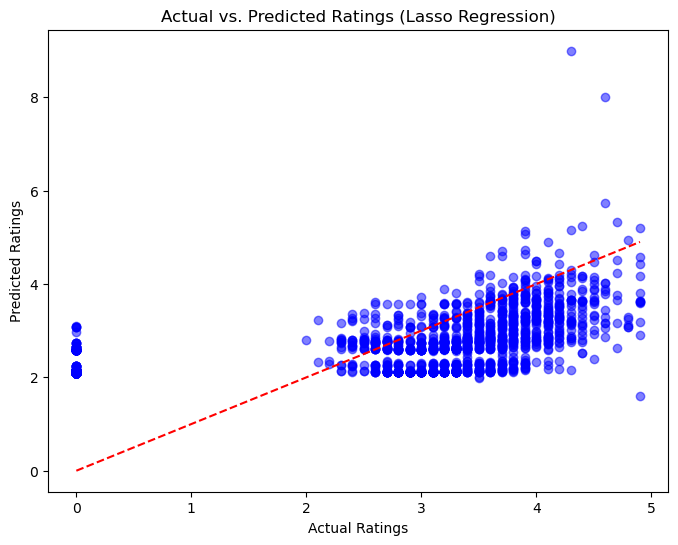

In [16]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Aggregate rating'])  # Assuming 'Aggregate rating' is the target variable
y = data['Aggregate rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Lasso regression model
lasso_model = Lasso(alpha=0.1, random_state=42)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model's performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R^2):", r2_lasso)

# Visualize the actual vs. predicted ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings (Lasso Regression)')
plt.show()


Feature Selection

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Lasso regression model
lasso_model = Lasso(alpha=0.1, random_state=42)  # Adjust alpha as needed

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = lasso_model.coef_
feature_names = X.columns

# Create a DataFrame to store feature names and coefficients
feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Select the features with non-zero coefficients
selected_features = feature_coefficients_df[feature_coefficients_df['Coefficient'] != 0]

print("Selected Features:")
print(selected_features)

Selected Features:
                Feature  Coefficient
0             Longitude    -0.002990
1              Latitude     0.006305
2  Average Cost for two     0.000002
4   Has Online delivery     0.146880
7           Price range     0.485571
8                 Votes     0.000728


Model Evaluation,Fine-Tuning,Model Interpretation

Mean Squared Error (MSE): 1.6822658337320207
R-squared (R^2): 0.2653964285327024


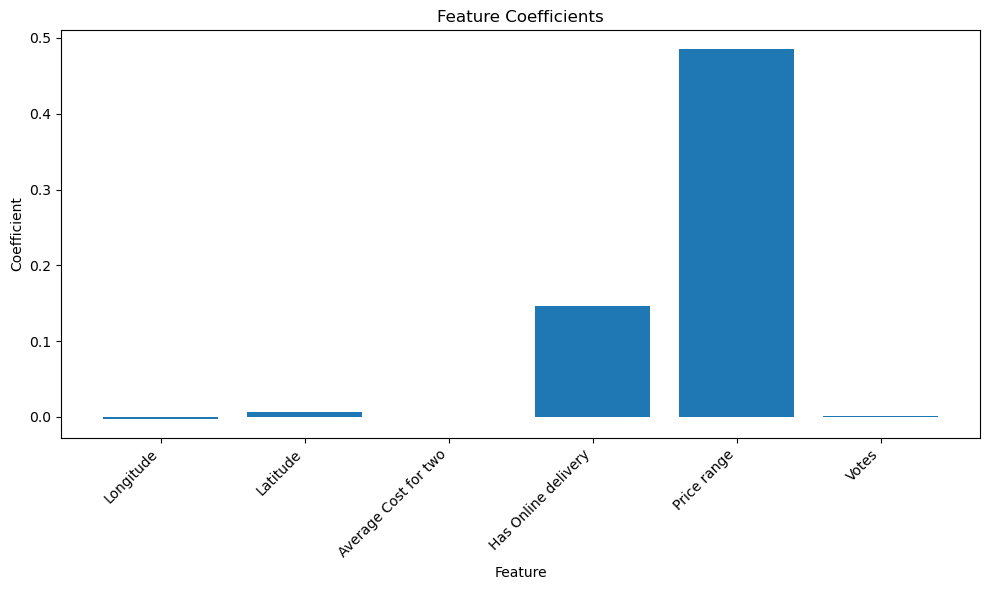

In [18]:
# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

# Model Interpretation: Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(selected_features['Feature'], selected_features['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#HYPERPARAMETER TUNING

In [19]:
# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Initialize Lasso regression model
lasso = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the Lasso regression model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Evaluate the model
y_pred_best = lasso_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best alpha:", best_alpha)
print("Mean Squared Error (MSE) with best parameters:", mse_best)
print("R-squared (R^2) with best parameters:", r2_best)


Best alpha: 0.01
Mean Squared Error (MSE) with best parameters: 1.5614784590382476
R-squared (R^2) with best parameters: 0.3181412653230683


cross validation

In [20]:
# Initialize Lasso regression model with the best alpha value
lasso_cv = Lasso(alpha=0.01)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Print cross-validation scores
print("Cross-Validation Mean Squared Error (MSE):", cv_scores)
print("Average Cross-Validation MSE:", cv_scores.mean())


Cross-Validation Mean Squared Error (MSE): [2.22651396 1.47274809 1.85691108 1.70036487 3.34825497]
Average Cross-Validation MSE: 2.120958592933335


In [21]:
# Calculate Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculate R-squared (R^2) score
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R^2):", r2_lasso)

Lasso Regression Model:
Mean Squared Error (MSE): 1.6822658337320207
R-squared (R^2): 0.2653964285327024


Sorted Feature Coefficients:
                     Coefficient
Price range             0.485571
Has Online delivery     0.146880
Latitude                0.006305
Longitude              -0.002990
Votes                   0.000728
...                          ...
Drinks Only            -0.000000
Durban                  0.000000
D�_ner                  0.000000
European                0.000000
World Cuisine           0.000000

[154 rows x 1 columns]


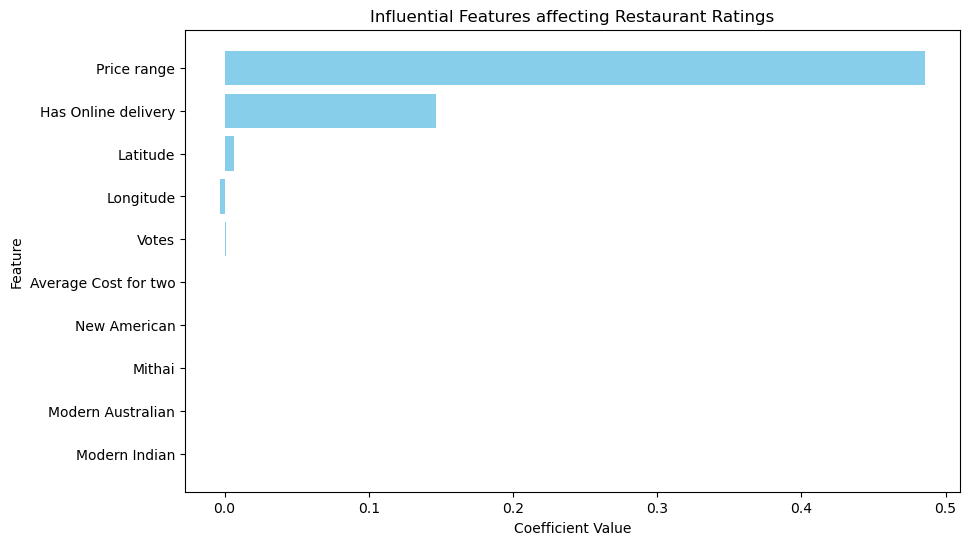

In [22]:
# Extracting feature coefficients
coefficients = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])

# Sort coefficients by magnitude
sorted_coefficients = coefficients.reindex(coefficients.abs().sort_values(by='Coefficient', ascending=False).index)

# Display sorted feature coefficients
print("Sorted Feature Coefficients:")
print(sorted_coefficients)

# Extracting the top 10 influential features and their coefficients
top_features = sorted_coefficients.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Influential Features affecting Restaurant Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to show the most influential feature at the top
plt.show()